In [1]:
import tabula
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pl
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# pdf file with all data to make the analysis:
pdf_name = 'SuplementoEstadistico2021.pdf'

In [2]:
#-----------------------Useful functions-----------------------#

# To read data in pdf file:
def read_pdf(pdf_name, pags):
    df = tabula.read_pdf(
        pdf_name,
        pages=pags,
        stream=True,
        lattice=True,
        pandas_options={'header': [0]},
        multiple_tables=True)
    return df

#-----------------------Prepare data-----------------------#

In [3]:
#+++++++++++++++++++++++ Academic Degree for Prof +++++++++++++++++++++++#

Dat0 = read_pdf(pdf_name, '7-8') # Years 2010, 2015 and 2021-I. Table is in pages 7 and 8.

Esc_Prof = pd.concat([Dat0[1], Dat0[2]], ignore_index=True) # Number of Prof. with Doc., Mas., and Preg. per depto.

Esc_Prof.drop(Esc_Prof.index[0:2], inplace=True) # Rows 0 and 1 aren't useful.
Carreras_Prof = Esc_Prof[0] # Carreras Ofertadas
Esc_Prof.drop(columns=[0, 5, 10], inplace=True, axis=1) # Columns 5 and 10 aren't useful.

Esc_Prof.columns = ['D_2010', 'M_2010', 'E/P_2010', 'Total_2010',
                    'D_2015', 'M_2015', 'E/P_2015', 'Total_2015',
                    'D_2021', 'M_2021', 'E/P_2021', 'Total_2021']

Esc_Prof.set_axis(Carreras_Prof, axis=0, inplace=True) # Rename index from 0 to len row data.
Esc_Prof.index.name = 'Facultad / Departamento'

# Change data from str to float:
for col in Esc_Prof.columns[1:]:
    Esc_Prof[col] = Esc_Prof[col].astype(float) # Converts strings to float to make possible calculations.

Esc_Prof = Esc_Prof.fillna(0) # Change all NaN elements to 0 value.
Esc_Prof.to_csv('T1_Sup_Est_2021-I.csv') # Save dataframe in a csv-file.
Esc_Prof

,D_2010,M_2010,E/P_2010,Total_2010,D_2015,M_2015,E/P_2015,Total_2015,D_2021,M_2021,E/P_2021,Total_2021
Facultad / Departamento,,,,,,,,,,,,
Administración,27,19.0,2.0,48.0,39.0,13.0,4.0,55.0,55.0,10.0,0.0,65.0
Arquitectura,2,15.0,7.0,23.0,12.0,11.0,3.0,26.0,10.0,16.0,1.0,27.0
Diseño,0,22.0,1.0,23.0,1.0,24.0,1.0,26.0,7.0,23.0,1.0,31.0
Decanatura Facultad,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
Arquitectura y Diseño,2,37.0,8.0,46.0,13.0,34.0,5.0,52.0,17.0,40.0,2.0,59.0
Arte,4,13.0,1.0,18.0,4.0,13.0,1.0,18.0,0.0,17.0,0.0,17.0
Historia del Arte,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0
Humanidades y literatura,12,1.0,1.0,14.0,12.0,1.0,1.0,14.0,16.0,0.0,1.0,17.0
Música,1,12.0,5.0,18.0,4.0,9.0,4.0,17.0,8.0,11.0,2.0,21.0


In [4]:
#+++++++++++++++++++++++ Number of Students +++++++++++++++++++++++#

Dat1 = read_pdf(pdf_name, '16-17') # Years 2016 (I, II) to 2021-I. Table is in pages 16 and 17.

Dat1[1] = Dat1[1].drop(Dat1[1].index[0]) # Row 0 isn't useful.
Dat1[2] = Dat1[2].drop(Dat1[2].index[0]) # Row 0 isn't useful.

Num_Est = pd.concat([Dat1[1], Dat1[2]], ignore_index=True) # Number of Prof. with Doc., Mas., and Preg. per depto.

Carreras_Est = Num_Est[0] # Carreras Ofertadas
Num_Est.drop(columns=[0], inplace=True, axis=1) # Column 0 isn't useful.

Num_Est.columns = ['2016-1', '2016-2', '2017-1', '2017-2', '2018-1', '2018-2',
                   '2019-1', '2019-2', '2020-1', '2020-2', '2021-1']

Num_Est.set_axis(Carreras_Est, axis=0, inplace=True) # Rename index from 0 to len row data.
Num_Est.index.name = 'Facultad / Departamento'

# Change data from str to float:
for col in Num_Est.columns[1:]:
    Num_Est[col] = Num_Est[col].str.replace(',','') # The , makes problems to convert to float.
    Num_Est[col] = Num_Est[col].astype(float) # Converts strings to float to make possible calculations.

Num_Est = Num_Est.fillna(0) # Change all NaN elements to 0 value.
Num_Est.to_csv('T5_Sup_Est_2021-I.csv') # Save dataframe in a csv-file.
Num_Est

,2016-1,2016-2,2017-1,2017-2,2018-1,2018-2,2019-1,2019-2,2020-1,2020-2,2021-1
Facultad / Departamento,,,,,,,,,,,
Administración,"1,009",997.0,985.0,989.0,989.0,1019.0,1020.0,1037.0,1058.0,1159.0,1202.0
Contaduría internacional,29,48.0,60.0,85.0,88.0,100.0,104.0,107.0,110.0,97.0,93.0
Administración,"1,038",1045.0,1045.0,1074.0,1077.0,1119.0,1124.0,1144.0,1168.0,1256.0,1295.0
Arquitectura,717,731.0,732.0,724.0,715.0,681.0,718.0,720.0,723.0,691.0,722.0
Diseño,710,730.0,761.0,751.0,761.0,765.0,781.0,793.0,795.0,812.0,833.0
Arquitectura y Diseño,"1,427",1461.0,1493.0,1475.0,1476.0,1446.0,1499.0,1513.0,1518.0,1503.0,1555.0
Arte,278,290.0,298.0,291.0,280.0,267.0,230.0,241.0,221.0,203.0,204.0
Historia del Arte,52,65.0,78.0,77.0,81.0,72.0,72.0,64.0,56.0,63.0,58.0
Literatura,181,182.0,200.0,198.0,210.0,202.0,196.0,181.0,168.0,160.0,139.0


In [6]:
Facultades = ['Administración', 'Arquitectura y Diseño', 'Artes y Humanidades',
              'Ciencias', 'Ciencias Sociales', 'Derecho', 'Economía', 'Educación',
              'Escuela de Gobierno', 'Ingeniería', 'Medicina']

Departamentos = ['Administración', 'Arquitectura', 'Diseño', 'Arte', 'Historia del Arte',
               'Humanidades y literatura', 'Música', 'Ciencias Biológicas', 'Física',
               'Geociencias', 'Matemáticas', 'Química', 'Antropología', 'Ciencia Política', 'Filosofía',
               'Historia y Geografía*', 'Lenguas y Cultura', 'Psicología', 'Derecho', 'Economía',
               'Educación', 'Escuela de Gobierno', 'Ing. Biomédica', 'Ing. Civil y Ambiental',
               'Ing. Eléctrica y Electrónica', 'Ing. Industrial', 'Ing. Mecánica',
               'Ing. Química y Alimentos**', 'Ing. Sistemas', 'Medicina']

#Esc_Prof.index.is_unique # return False value
#Esc_Prof.index.duplicated() # Show the duplicate index in dataframe

Prof_per_Fac = Esc_Prof.loc[~Esc_Prof.index.duplicated(), :] # Erase duplicated index
Prof_per_Fac = Prof_per_Fac.filter(items=Facultades, axis=0) # Filter data per Faculty
Prof_per_Fac.index.name = 'Facultad' # Rename index name

#Prof_per_Dept = Esc_Prof.loc[~Esc_Prof.index.duplicated(), :] # Erase duplicated index
#Prof_per_Dept = Prof_per_Dept.filter(items=Departamentos, axis=0) # Filter data per Depto
#Prof_per_Dept.index.name = 'Departamento' # Rename index name

Fac_Data_2021 = pd.merge(Prof_per_Fac, Num_Est['2021-1'], left_index=True, right_index=True)
Fac_Data_2021.set_axis(range(0, len(Fac_Data_2021)), axis=0, inplace=True) # Rename index from 0 to len row data
Fac_Data_2021.drop(Fac_Data_2021.index[0], inplace=True) # Row 0 isn't useful
Fac_Data_2021.set_axis(Facultades, axis=0, inplace=True) # Rename index from 0 to len row data.
Fac_Data_2021

,D_2010,M_2010,E/P_2010,Total_2010,D_2015,M_2015,E/P_2015,Total_2015,D_2021,M_2021,E/P_2021,Total_2021,2021-1
Administración,27,19.0,2.0,48.0,39.0,13.0,4.0,55.0,55.0,10.0,0.0,65.0,1295.0
Arquitectura y Diseño,2,37.0,8.0,46.0,13.0,34.0,5.0,52.0,17.0,40.0,2.0,59.0,1555.0
Artes y Humanidades,17,29.0,7.0,53.0,23.0,28.0,7.0,58.0,39.0,35.0,3.0,77.0,745.0
Ciencias,74,19.0,7.0,99.0,103.0,16.0,8.0,127.0,112.0,15.0,5.0,132.0,1047.0
Ciencias Sociales,67,17.0,2.0,86.0,82.0,15.0,1.0,97.0,91.0,19.0,1.0,111.0,1126.0
Derecho,14,18.0,4.0,35.0,25.0,12.0,1.0,38.0,35.0,6.0,0.0,41.0,1248.0
Economía,26,8.0,0.0,34.0,32.0,6.0,0.0,38.0,32.0,5.0,0.0,37.0,1029.0
Educación,7,5.0,0.0,12.0,12.0,4.0,0.0,16.0,17.0,0.0,0.0,17.0,40.0
Escuela de Gobierno,4,1.0,0.0,5.0,10.0,1.0,0.0,11.0,15.0,0.0,1.0,16.0,276.0
Ingeniería,73.0,50.0,6.0,128.0,94.0,35.0,3.0,132.0,114.0,32.0,2.0,148.0,4896.0


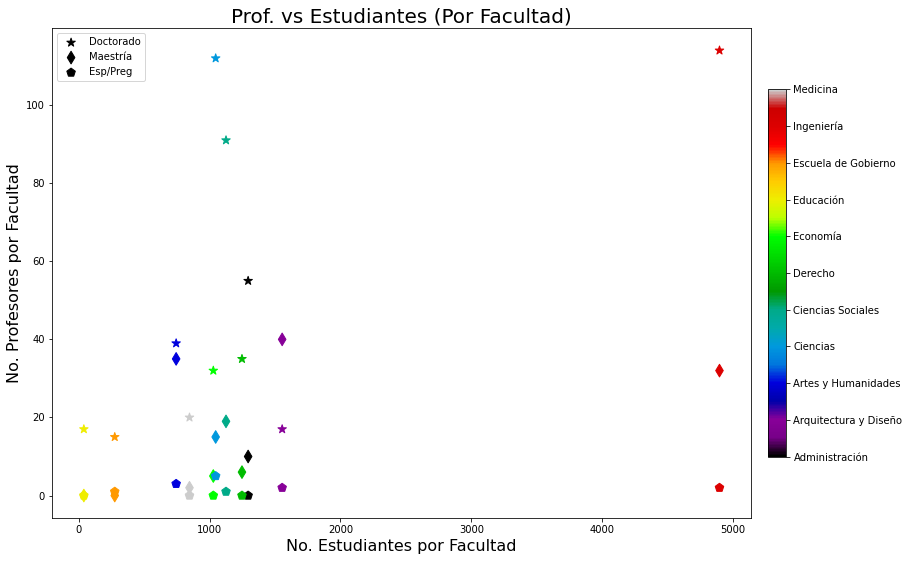

In [7]:
pl.rcParams["figure.figsize"] = [12, 8]

# setup the normalization and the colormap
deps = np.arange(0, len(Fac_Data_2021.index))
normalize = mcolors.Normalize(vmin = deps.min(), vmax = deps.max())
colormap = cm.get_cmap('nipy_spectral')#, deps.max()+1)

fig = pl.figure()

pl.xlabel('No. Estudiantes por Facultad',  fontsize = 16)
pl.ylabel('No. Profesores por Facultad',  fontsize = 16)
pl.title('Prof. vs Estudiantes (Por Facultad)',  fontsize = 20)


pl.scatter(Fac_Data_2021['2021-1'], Fac_Data_2021['D_2021'], label='Doctorado',
           marker='*', s=80, c=range(0, len(Fac_Data_2021)), cmap='nipy_spectral')
pl.scatter(Fac_Data_2021['2021-1'], Fac_Data_2021['M_2021'], label='Maestría',
           marker='d', s=80, c=range(0, len(Fac_Data_2021)), cmap='nipy_spectral')
pl.scatter(Fac_Data_2021['2021-1'], Fac_Data_2021['E/P_2021'], label='Esp/Preg',
           marker='p', s=80, c=range(0, len(Fac_Data_2021)), cmap='nipy_spectral')
pl.legend()

# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(deps)

cbar = pl.colorbar(scalarmappaple, orientation='vertical', pad=0.02,
                   ticks=range(0, deps.max()+1, 1), shrink=0.75)
cbar.ax.set_yticklabels(Fac_Data_2021.index)

pl.subplots_adjust(left=0.075, bottom=0.075, right=1.05, top=0.925)
pl.show()
fig.savefig('1st_plot.pdf', dpi=500)
pl.close(fig)

(                        Doc/Est   Mas/Est    EP/Est
 Administración         0.042471  0.007722  0.000000
 Arquitectura y Diseño  0.010932  0.025723  0.001286
 Artes y Humanidades    0.052349  0.046980  0.004027
 Ciencias               0.106972  0.014327  0.004776
 Ciencias Sociales      0.080817  0.016874  0.000888
 Derecho                0.028045  0.004808  0.000000
 Economía               0.031098  0.004859  0.000000
 Educación              0.425000  0.000000  0.000000
 Escuela de Gobierno    0.054348  0.000000  0.003623
 Ingeniería             0.023284  0.006536  0.000408
 Medicina               0.023613  0.002361  0.000000,
 array([0.03878332, 0.01162791, 0.00099263]),
 array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.]))

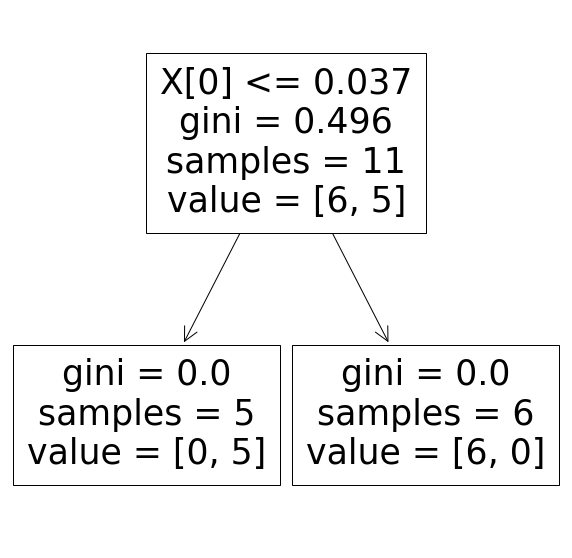

In [8]:

XD = pd.DataFrame(Fac_Data_2021['D_2021']/Fac_Data_2021['2021-1'], columns=['Doc/Est'])
XM = pd.DataFrame(Fac_Data_2021['M_2021']/Fac_Data_2021['2021-1'], columns=['Mas/Est'])
XEP = pd.DataFrame(Fac_Data_2021['E/P_2021']/Fac_Data_2021['2021-1'], columns=['EP/Est'])

Data = pd.DataFrame()
Data = pd.concat([Data, XD, XM, XEP], axis=1)

Tot_Prof_D = Fac_Data_2021['D_2021'].sum()
Tot_Prof_M = Fac_Data_2021['M_2021'].sum()
Tot_Prof_EP = Fac_Data_2021['E/P_2021'].sum()
Tot_Est = Fac_Data_2021['2021-1'].sum()

Y = np.array([Tot_Prof_D/Tot_Est, Tot_Prof_M/Tot_Est, Tot_Prof_EP/Tot_Est])


#Problema de Clasificación Binario
target = np.ones(len(Fac_Data_2021))
ii = Data.loc[:,'Doc/Est'] > Y[0]
target[ii] = 0
target[~ii] = 1
(Data, Y, target)

import sklearn.tree

clf = sklearn.tree.DecisionTreeClassifier(max_depth=1)

clf.fit(Data, target)

pl.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

(Data, Y, target)

In [9]:
clf.predict(Data)

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.])

In [10]:
sklearn.metrics.f1_score(target, clf.predict(Data))

1.0

1.0


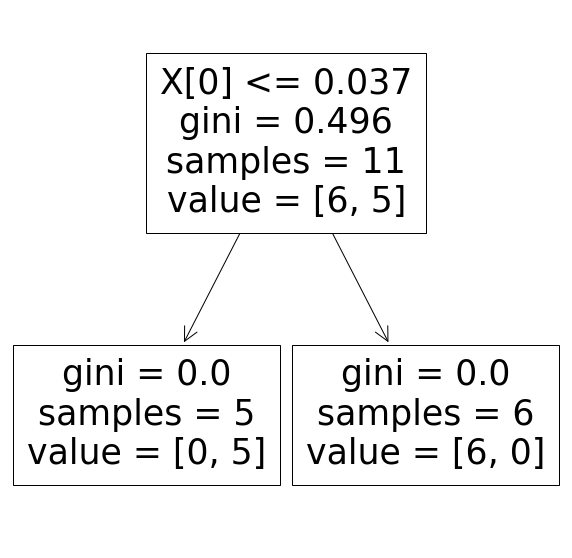

In [12]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=2)
clf.fit(Data, target)
print(sklearn.metrics.f1_score(target, clf.predict(Data)))
pl.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [14]:
clf.feature_importances_

array([1., 0., 0.])

1.0


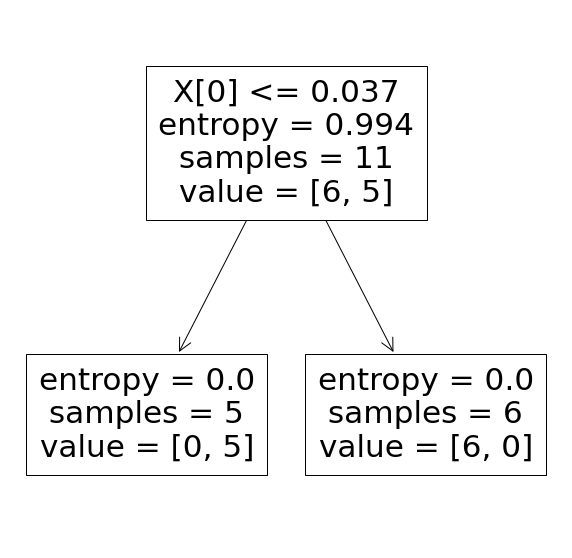

In [13]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(Data, target)
print(sklearn.metrics.f1_score(target, clf.predict(Data)))
pl.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [15]:
clf.feature_importances_

array([1., 0., 0.])